# Projeto de Análise de Ações da Bolsa

Nesse projeto usei meu conhecimento de Data Science para analisar dados da bolsa de valores, mas especificamente do Mercado de Ações.

Utilizando ferramentas de Análises de Dados amplamente conhecidas como Pandas e Numpy, foi trabalhado também com uma API que é voltada para o mercado financeiro que é a 'yfinance'. Com ela conseguimos analisar e filtrar dados de mercado sobre criptomoedas, moedas normais, ações e títulos, e a partir disso fazer uma análise mais completa e em *real-time*.

# 0.0 Imports

In [1]:
import yfinance as yf
import pandas   as pd
import numpy    as np
import seaborn  as sns

from matplotlib import pyplot    as plt
from datetime   import datetime, timedelta

In [2]:
petr = yf.Ticker('PETR4.SA')

# 1.0 Ibovespa

In [137]:
# lendo o dataset
df_ibov = pd.read_csv('/content/ibovdia_09-08-22.csv')


In [138]:
# Substituindo Valores
df_ibov['Part. (%)'] = df_ibov['Part. (%)'].apply(lambda x: float(x.replace(',', '.')))

## 01. Vamos analisar o histórico das 10 ações com maior participação na bolsa. Encontre estes ativos no DataFrame 'df_ibov' e os carregue em um objeto Tickers do módulo Yahoo.

In [35]:
# filtrando as ações
acoes = df_ibov.sort_values('Part. (%)').tail(10)['Código'].values

In [36]:
acoes

array(['RENT3', 'ELET3', 'BBAS3', 'ABEV3', 'B3SA3', 'BBDC4', 'PETR3',
       'ITUB4', 'PETR4', 'VALE3'], dtype=object)

In [44]:
# adicionando os '.SA'
' '.join(acoes)
[i +'.SA' for i in acoes]

['RENT3.SA',
 'ELET3.SA',
 'BBAS3.SA',
 'ABEV3.SA',
 'B3SA3.SA',
 'BBDC4.SA',
 'PETR3.SA',
 'ITUB4.SA',
 'PETR4.SA',
 'VALE3.SA']

In [46]:
# nomeando e adicionando '.SA'
tickers = yf.Tickers(' '.join([i+'.SA' for i in acoes]))
tickers.tickers

{'RENT3.SA': yfinance.Ticker object <RENT3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'ABEV3.SA': yfinance.Ticker object <ABEV3.SA>,
 'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'PETR3.SA': yfinance.Ticker object <PETR3.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>,
 'VALE3.SA': yfinance.Ticker object <VALE3.SA>}

## 02. Crie um dicionário que conterá como chaves os Tickers de cada ativo (PETR4.SA, por exemplo) e como valores um DataFrame contendo dados históricos de cada.

In [139]:
# criando dicionário

dict_data = {}

for ticker in tickers.tickers.keys():
  print('Baixando:{}'.format(ticker))
  dict_data[ticker] = tickers.tickers[ticker].history(period='max')

Baixando:RENT3.SA
Baixando:ELET3.SA
Baixando:BBAS3.SA
Baixando:ABEV3.SA
Baixando:B3SA3.SA
Baixando:BBDC4.SA
Baixando:PETR3.SA
Baixando:ITUB4.SA
Baixando:PETR4.SA
Baixando:VALE3.SA


In [51]:
dict_data['VALE3.SA']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-02:00,1.531955,1.550557,1.531955,1.531955,585600,0.0,0.0
2000-01-04 00:00:00-02:00,1.517364,1.520647,1.495479,1.495479,782400,0.0,0.0
2000-01-05 00:00:00-02:00,1.477242,1.495479,1.477242,1.495479,1876800,0.0,0.0
2000-01-06 00:00:00-02:00,1.495479,1.531954,1.495479,1.495479,792000,0.0,0.0
2000-01-07 00:00:00-02:00,1.513717,1.557852,1.513717,1.550192,5347200,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-04 00:00:00-03:00,61.389999,61.400002,60.700001,61.240002,19865100,0.0,0.0
2024-06-05 00:00:00-03:00,61.099998,61.180000,60.310001,60.369999,18000800,0.0,0.0
2024-06-06 00:00:00-03:00,60.770000,61.330002,60.360001,61.209999,17888300,0.0,0.0


## 03. Combine todos os dados em um único DataFrame, utilizando o preço de fechamento de cada ativo.

In [140]:
# criando DataFrame e Selecionando Variáveis
df_data = pd.DataFrame()

for ticker in dict_data.keys():
  df_aux = dict_data[ticker].rename(columns={'Close':ticker})
  df_data = df_data.join(df_aux[ticker], how='outer')

In [59]:
df_data

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,8.875166,0.531419,NaN,NaN,NaN,1.407103,NaN,1.443122,1.531955
2000-01-04 00:00:00-02:00,NaN,8.446088,0.506144,NaN,NaN,NaN,1.328133,NaN,1.363290,1.495479
2000-01-05 00:00:00-02:00,NaN,8.784834,0.511330,0.290351,NaN,NaN,1.346080,NaN,1.349534,1.495479
2000-01-06 00:00:00-02:00,NaN,8.581586,0.518458,0.275633,NaN,NaN,1.335312,NaN,1.344867,1.495479
2000-01-07 00:00:00-02:00,NaN,8.717084,0.506792,0.275633,NaN,NaN,1.346080,NaN,1.351007,1.550192
...,...,...,...,...,...,...,...,...,...,...
2024-06-04 00:00:00-03:00,42.840000,35.759998,27.230000,11.690000,10.71,12.85,40.020000,31.559999,38.150002,61.240002
2024-06-05 00:00:00-03:00,43.020000,36.099998,27.290001,11.570000,10.74,12.78,39.950001,31.500000,38.200001,60.369999
2024-06-06 00:00:00-03:00,43.700001,36.540001,27.650000,11.820000,11.08,13.05,39.939999,31.900000,38.380001,61.209999


## 04. Qual é a primeira data na qual os ativos estudados já estavam na bolsa ?

In [71]:
# selecionando a primeira data de todos ativos
data = df_data.dropna().index[0]

# print da data sem as horas
print(data)

2008-01-02 00:00:00-02:00


## 05. Crie um DataFrame para representar a variação percentual diária de cada ativo?

In [73]:
df_ret = df_data / df_data.shift(1) - 1

In [141]:
df_ret

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,,,
2000-01-03 00:00:00-02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-02:00,NaN,-0.048346,-0.047561,NaN,NaN,NaN,-0.056122,NaN,-0.055319,-0.023810
2000-01-05 00:00:00-02:00,NaN,0.040107,0.010245,NaN,NaN,NaN,0.013513,NaN,-0.010090,0.000000
2000-01-06 00:00:00-02:00,NaN,-0.023136,0.013940,-0.050691,NaN,NaN,-0.007999,NaN,-0.003458,0.000000
2000-01-07 00:00:00-02:00,NaN,0.015789,-0.022500,0.000000,NaN,NaN,0.008064,NaN,0.004566,0.036586
...,...,...,...,...,...,...,...,...,...,...
2024-06-04 00:00:00-03:00,0.004455,0.008745,0.002947,0.012121,0.001871,0.009345,-0.005714,0.003498,-0.011146,-0.010183
2024-06-05 00:00:00-03:00,0.004202,0.009508,0.002204,-0.010265,0.002801,-0.005448,-0.001749,-0.001901,0.001311,-0.014206
2024-06-06 00:00:00-03:00,0.015807,0.012188,0.013192,0.021608,0.031657,0.021127,-0.000250,0.012698,0.004712,0.013914


## 06. Quais foram as datas na qual cada ativo representou sua pior oscilação? Apresente também a variação percentual.

In [75]:
# selecionando a data de pior ocilação
df_ret.idxmin()

RENT3.SA   2020-03-16 00:00:00-03:00
ELET3.SA   2010-02-01 00:00:00-02:00
BBAS3.SA   2016-03-15 00:00:00-03:00
ABEV3.SA   2005-04-04 00:00:00-03:00
B3SA3.SA   2011-05-09 00:00:00-03:00
BBDC4.SA   2009-05-29 00:00:00-03:00
PETR3.SA   2020-03-09 00:00:00-03:00
ITUB4.SA   2021-10-04 00:00:00-03:00
PETR4.SA   2020-03-09 00:00:00-03:00
VALE3.SA   2019-01-28 00:00:00-02:00
dtype: datetime64[ns, America/Sao_Paulo]

In [76]:
# selecionando o percentual da pior ocilação
df_ret.min()

RENT3.SA   -0.234218
ELET3.SA   -0.220074
BBAS3.SA   -0.211712
ABEV3.SA   -0.224263
B3SA3.SA   -0.661336
BBDC4.SA   -0.432508
PETR3.SA   -0.296758
ITUB4.SA   -0.179643
PETR4.SA   -0.296978
VALE3.SA   -0.245592
dtype: float64

## 07. Analisando esta série temporal, você conseguiria estimar avaliar se existe uma maior probabilidade maior dos ativos performarem bem logo após um dia de queda?

In [79]:
# conferindo a média das ações
df_ret[df_ret.shift(1) < 0].mean()

RENT3.SA    0.001155
ELET3.SA   -0.000059
BBAS3.SA    0.000516
ABEV3.SA    0.001085
B3SA3.SA    0.001183
BBDC4.SA    0.000692
PETR3.SA    0.000411
ITUB4.SA    0.000434
PETR4.SA    0.000602
VALE3.SA    0.000360
dtype: float64

In [80]:
# conferindo o desvio padrão das ações
df_ret[df_ret.shift(1) < 0].std()

RENT3.SA    0.027095
ELET3.SA    0.030808
BBAS3.SA    0.027881
ABEV3.SA    0.018357
B3SA3.SA    0.028534
BBDC4.SA    0.024372
PETR3.SA    0.029013
ITUB4.SA    0.022893
PETR4.SA    0.028502
VALE3.SA    0.025483
dtype: float64

Média dos Retornos
RENT3 - 0.11548644079487613
ELET3 - -0.005878518215211087
BBAS3 - 0.05164910621071947
ABEV3 - 0.10846236647116016
B3SA3 - 0.11829738322546383
BBDC4 - 0.06915104131429468
PETR3 - 0.04114253525495707
ITUB4 - 0.04337220388784002
PETR4 - 0.06024110806339024
VALE3 - 0.03602026566930303
Desvio Padrão dos Retornos
RENT3 - 2.709486416983612
ELET3 - 3.080840654949472
BBAS3 - 2.78806252566716
ABEV3 - 1.8356832933909044
B3SA3 - 2.8533626166936665
BBDC4 - 2.437196454083774
PETR3 - 2.9013444482074484
ITUB4 - 2.2892661205449034
PETR4 - 2.8501854450800517
VALE3 - 2.548303705662069


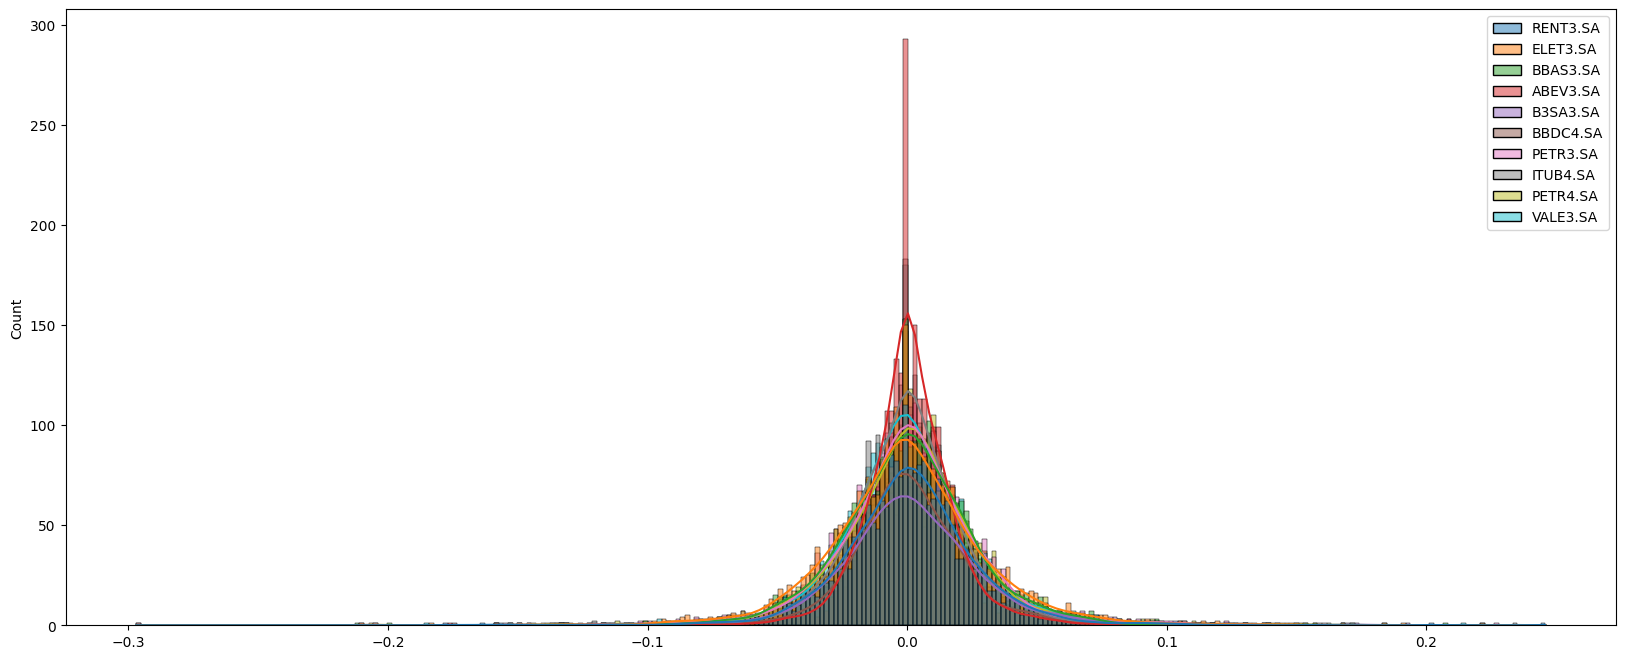

In [84]:
# selecionando a variavel
df_study = df_ret[df_ret.shift(1) < 0]

# plotando o grafico para a análise
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(df_study, kde=True)

print('Média dos Retornos')
for acao in acoes:
  print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))

print('Desvio Padrão dos Retornos')
for acao in acoes:
  print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

Resposta: Não! Pois as ações estão centralizadas em 0.0, o que significa que não temos bons prognosticos para investir após dia 1 da queda.

## 08. Seguindo a lógica da questão anterior, avalie como em média se comportam as ações no pregão seguinte a quedas maiores que 1%. De posse destes dados, você acredita que seria uma boa estratégia de investimento comprar ações que caíram no dia anterior?

Média dos Retornos
RENT3 - 0.129658251744858
ELET3 - 0.010258727606551433
BBAS3 - 0.09108668543809316
ABEV3 - 0.19873227031572727
B3SA3 - 0.13520537154891546
BBDC4 - 0.12875107933694854
PETR3 - 0.015055853413872687
ITUB4 - 0.06010999921795068
PETR4 - 0.015210428306965213
VALE3 - -0.02712518897828414
Desvio Padrão dos Retornos
RENT3 - 2.937164804173247
ELET3 - 3.2982118704806727
BBAS3 - 3.0579553406004742
ABEV3 - 2.1173826822610384
B3SA3 - 3.134733066759665
BBDC4 - 2.707041212424612
PETR3 - 3.1017884932472057
ITUB4 - 2.5190882640358074
PETR4 - 3.0673514226583802
VALE3 - 2.7342735436652204


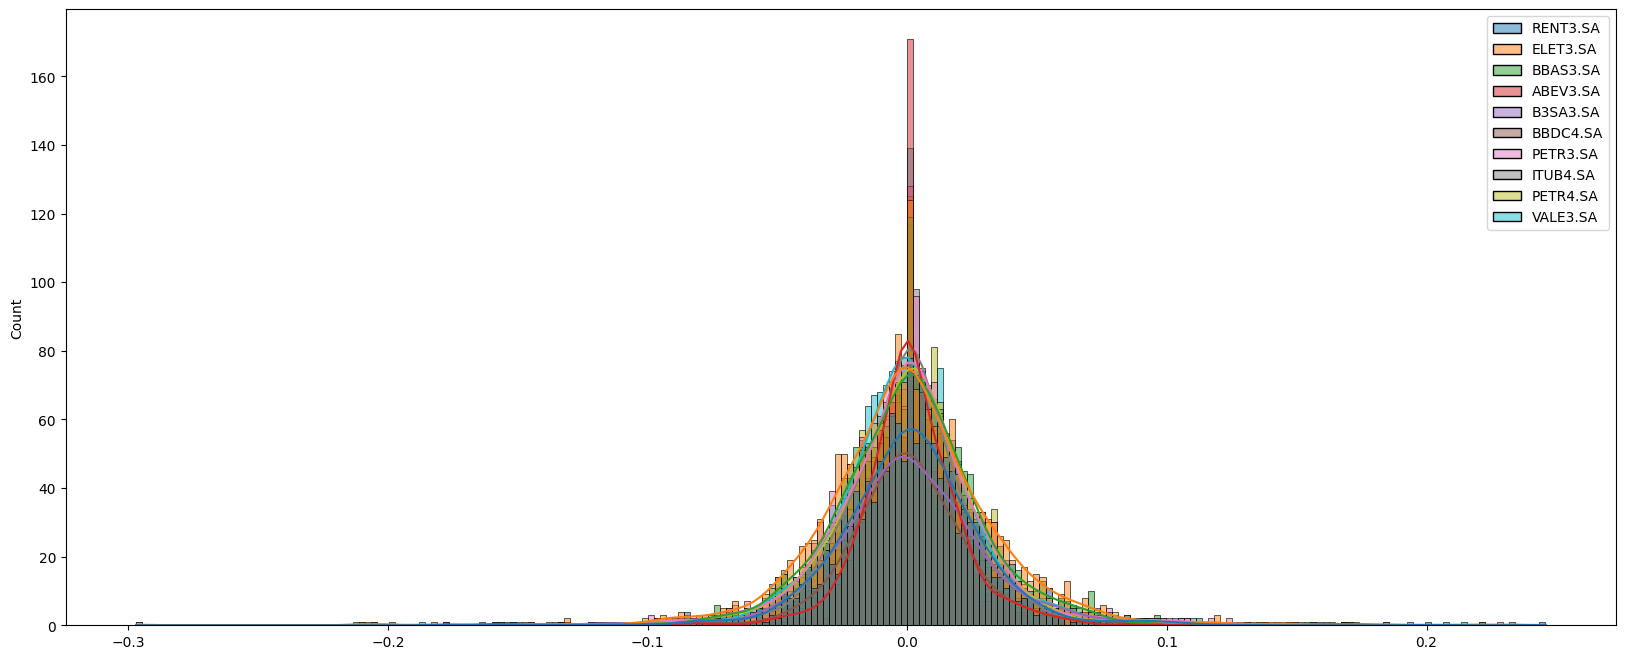

In [87]:
# selecionando a variavel
df_study = df_ret[df_ret.shift(1) < -0.01]

# plotando o grafico para a análise
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(df_study, kde=True)

print('Média dos Retornos')
for acao in acoes:
  print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))

print('Desvio Padrão dos Retornos')
for acao in acoes:
  print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

Resposta: Não ! As Ações ainda não se comportam bem suficiente para a realização das compras.

# 2.0 Desafios

## 09. De tempos em tempos, empresas podem distribuir lucros entres os acionistas na forma de dividendos. Podemos obter o histórico de pagamentos de dividendos usando a yfinance. Um indicador muito utilizado no mercado é o Dividend Yield (DY), que é calculado somando-se o total pago de dividendos no ano e dividendo pela cotação da ação. Calcule o DY anual de cada ativo.

In [108]:
# criando novo DataFrame
df_dividends = pd.DataFrame()

# selecionando e renomeando a variavel
for ticker in tickers.tickers.keys():
  df_dividens_aux = tickers.tickers[ticker].dividends.to_frame().rename(columns={'Dividends': ticker})
  df_dividends = df_dividends.join(df_dividens_aux, how='outer')

In [109]:
# criando as colunas 'Year'
df_dividends['year'] = df_dividends.index.year
df_data['year'] = df_data.index.year

In [110]:
# Agrupando e Selecionando
df_dividends_year = df_dividends.groupby('year').sum()
df_last_price =  df_data.dropna().groupby('year').last()

In [111]:
# calculando a variavel e dropando valores Nulos
df_yield = df_dividends_year / df_last_price * 100
df_yield.dropna(inplace=True)

In [112]:
df_yield

,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA
year,,,,,,,,,,
2008,7.387206,3.498521,0.000000,5.006769,0.672569,5.402730,0.505111,0.000000,4.763259,4.685162
2009,1.065153,8.759182,7.462978,4.593806,1.479746,3.907931,8.027083,0.000000,10.042146,4.501597
2010,0.762366,30.264957,13.307891,2.233234,1.939429,4.278826,7.918389,1.372840,10.138553,3.495166
2011,1.718858,8.811380,17.092042,3.204797,8.341326,5.948715,11.818421,6.519506,14.036603,12.981530
2012,1.419138,33.260278,12.932187,4.417765,4.359452,4.663027,7.503350,5.733653,8.223091,10.373173
2013,5.169684,30.583097,17.938609,2.268820,6.447583,4.748762,2.438724,5.030670,7.096918,5.190199
2014,1.585751,8.496658,12.024988,5.370365,5.738185,5.718435,15.710639,4.389403,28.387258,15.218364
2015,3.079988,0.000000,21.799177,11.866052,9.579415,10.458387,0.000000,8.415891,0.000000,12.531998
2016,2.908432,0.000000,4.844949,5.047477,3.862983,6.311590,0.000000,6.596391,0.000000,1.077785


In [90]:
df_dividens_aux.to_frame().rename(columns={0:'dividends'})

Date
2008-04-11 00:00:00-03:00    0.436585
2008-10-17 00:00:00-03:00    0.138520
2009-04-16 00:00:00-03:00    0.524586
2009-10-16 00:00:00-03:00    0.492036
2010-04-15 00:00:00-03:00    0.421661
2010-10-15 00:00:00-03:00    0.471881
2011-01-17 00:00:00-02:00    0.320048
2011-04-14 00:00:00-03:00    0.608247
2011-08-12 00:00:00-03:00    0.933403
2011-10-17 00:00:00-02:00    0.634329
2012-04-16 00:00:00-03:00    1.075280
2012-10-17 00:00:00-03:00    1.186520
2013-04-17 00:00:00-03:00    0.864045
2013-10-18 00:00:00-03:00    0.120605
2014-04-15 00:00:00-03:00    0.898904
2014-10-17 00:00:00-03:00    0.990870
2015-04-15 00:00:00-03:00    0.601761
2015-10-16 00:00:00-03:00    0.373610
2016-12-02 00:00:00-02:00    0.166294
2017-04-24 00:00:00-03:00    0.905572
2017-12-22 00:00:00-02:00    0.419912
2018-03-07 00:00:00-03:00    0.488511
2018-08-03 00:00:00-03:00    1.480362
2019-12-27 00:00:00-03:00    1.414364
2020-09-22 00:00:00-03:00    2.407510
2021-03-05 00:00:00-03:00    4.261646
2021-06

In [88]:
tickers.tickers['VALE3.SA'].dividends

Date
2008-04-11 00:00:00-03:00    0.436585
2008-10-17 00:00:00-03:00    0.138520
2009-04-16 00:00:00-03:00    0.524586
2009-10-16 00:00:00-03:00    0.492036
2010-04-15 00:00:00-03:00    0.421661
2010-10-15 00:00:00-03:00    0.471881
2011-01-17 00:00:00-02:00    0.320048
2011-04-14 00:00:00-03:00    0.608247
2011-08-12 00:00:00-03:00    0.933403
2011-10-17 00:00:00-02:00    0.634329
2012-04-16 00:00:00-03:00    1.075280
2012-10-17 00:00:00-03:00    1.186520
2013-04-17 00:00:00-03:00    0.864045
2013-10-18 00:00:00-03:00    0.120605
2014-04-15 00:00:00-03:00    0.898904
2014-10-17 00:00:00-03:00    0.990870
2015-04-15 00:00:00-03:00    0.601761
2015-10-16 00:00:00-03:00    0.373610
2016-12-02 00:00:00-02:00    0.166294
2017-04-24 00:00:00-03:00    0.905572
2017-12-22 00:00:00-02:00    0.419912
2018-03-07 00:00:00-03:00    0.488511
2018-08-03 00:00:00-03:00    1.480362
2019-12-27 00:00:00-03:00    1.414364
2020-09-22 00:00:00-03:00    2.407510
2021-03-05 00:00:00-03:00    4.261646
2021-06

## 10. Avalie o desempenho de uma estratégia de investimento que monta um carteira de ações ano a ano com as 3 maiores pagadoras de dividendos do ano anterior. Compare o desempenho dela com o desempenho de uma carteira global.

In [116]:
# conferindo o retorno do ativo por ano
df_ret_year = df_last_price / df_last_price.shift(1) - 1

<Axes: xlabel='year'>

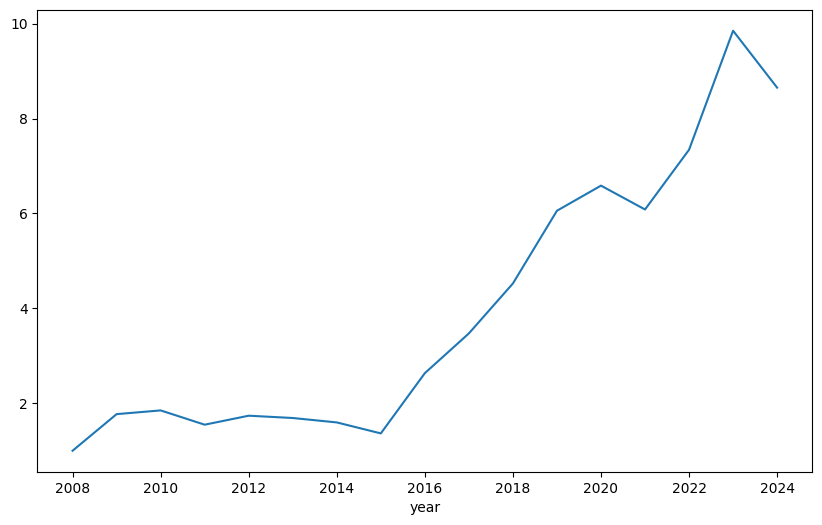

In [122]:
# calculando o investimento ao longo dos anos
((df_ret_year / 10).sum(axis=1) +1 ).cumprod().plot(figsize=(10,6))

In [124]:
# selecionando as três principais ações que mais pagaram durante ao ano
df_yield.iloc[0,:].nlargest(3).index

Index(['RENT3.SA', 'BBDC4.SA', 'ABEV3.SA'], dtype='object')

In [133]:
# criando a estratégia de retorno
strategy_return = []

for i in range(len(df_yield) - 1):
  stocks = df_yield.iloc[i,:].nlargest(3).index
  strategy_return += [(df_ret_year[stocks].iloc[i + 1] / 3 ).sum() + 1]

<Axes: xlabel='year'>

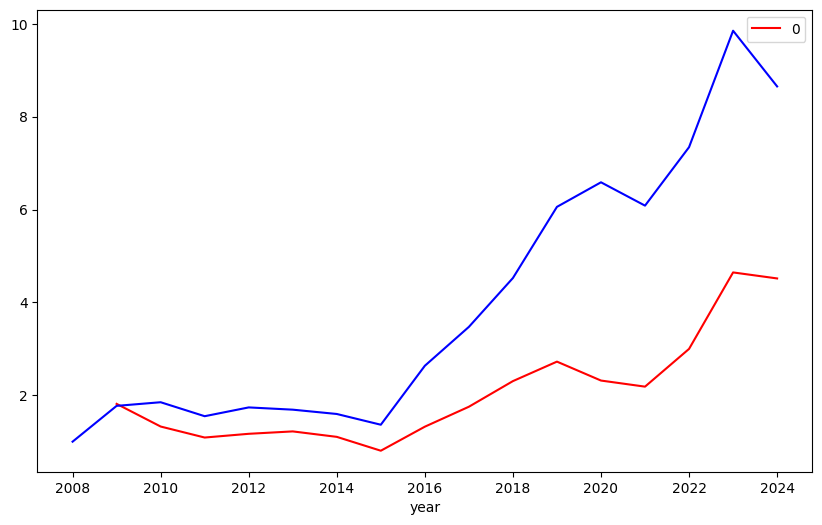

In [136]:
# criando a carteira global
df_global = df_ret_year / 10

# plotando gráfico para análise
fig, ax = plt.subplots(figsize=(10,6))
pd.DataFrame(strategy_return, index=df_global.index[1:]).cumprod().plot(color='red', ax=ax)
(df_global.sum(axis=1)+1).cumprod().plot(color='blue', ax=ax)